# **Project2: Estimation of Biochemical Reaction Rate**

# A Python program to estimate the rate of a biochemical reaction based on input parameters.


# **Tasks1: Data Import and Cleaning**
*   Import biochemical reaction data from a CSV file (e.g.,substrate concentration, enzyme
concentration, temperature).
*  Clean the data by handling any missing values or outliers.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Data Import
file_path ='/content/drive/MyDrive/Arpita_Khanom_Estimation_of_Biochemical_Reaction_Rate.csv'
data = pd.read_csv(file_path)

# Display initial rows of the dataset
print("Initial Data Preview:")
print(data.head())

# Step 2: Data Cleaning
# Handle missing values
print("\nHandling Missing Values...")
missing_values = data.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

data.fillna(data.mean(), inplace=True)  # Replace missing values with the column mean
print("\nMissing Values Handled.\n")

# Identify outliers using Z-score
print("Identifying Outliers...")
z_scores = np.abs((data - data.mean()) / data.std())  # Calculate Z-scores
threshold = 3  # Set threshold for outlier detection
outliers = (z_scores > threshold).sum()
print("Outliers per Column:")
print(outliers)

# Optionally remove outliers
for column in data.select_dtypes(include=[np.number]):  # Numeric columns only
    data = data[(z_scores[column] <= threshold) | (z_scores[column].isnull())]

# Display cleaned data summary
print("\nCleaned Data Preview:")
print(data.head())

# Optional: Save the cleaned data to a new file
cleaned_file_path = '/content/drive/MyDrive/Arpita_Khanom_Estimation_of_Biochemical_Reaction_Rate.csv'
data.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data saved to: {cleaned_file_path}")

Initial Data Preview:
   Experiment_ID  Substrate_Conc (mM)  Enzyme_Conc (µM)  Temperature (°C)  \
0              1                    5                10                30   
1              2                   10                15                35   
2              3                   15                20                40   
3              4                   20                25                45   
4              5                   25                30                50   

   Reaction_Rate (µM/s)  Reaction_Rate  
0                    50       9.090909  
1                    75      16.666667  
2                    95      23.076923  
3                   110      28.571429  
4                   125      33.333333  

Handling Missing Values...
Missing Values per Column:
Experiment_ID           0
Substrate_Conc (mM)     0
Enzyme_Conc (µM)        0
Temperature (°C)        0
Reaction_Rate (µM/s)    0
Reaction_Rate           0
dtype: int64

Missing Values Handled.

Identifying Outlier

# **Task2:Reaction Rate Calculation**

*   Calculate the biochemical reaction rate using a simplified Michaelis-Menten model:
Reaction Rate = (V_max * Substrate_Conc) / (Km + Substrate_Conc)      
Where:
         ▪ V_max is the maximum reaction rate.
         ▪ Km is the Michaelis constant.
         ▪ Substrate_Conc is the concentration of the substrate.


In [ ]:
import pandas as pd

# Load the cleaned data
cleaned_file_path = '/content/drive/MyDrive/Arpita_Khanom_Estimation_of_Biochemical_Reaction_Rate.csv'
data = pd.read_csv(cleaned_file_path)

# Constants for the Michaelis-Menten model
V_max = 100  # Example value for maximum reaction rate
Km = 50      # Example value for Michaelis constant

# Step 2: Reaction Rate Calculation
def calculate_reaction_rate(row):
    substrate_conc = row['Substrate_Conc (mM)']  # Ensure column name matches your dataset
    return (V_max * substrate_conc) / (Km + substrate_conc)

# Calculate reaction rates
print("Calculating reaction rates...")
data['Reaction_Rate'] = data.apply(calculate_reaction_rate, axis=1)

# Display data with reaction rates
print("\nData with Reaction Rates:")
print(data.head())

# Save the updated data to a new CSV file
output_file_path = '/content/drive/MyDrive/Arpita_Khanom_Estimation_of_Biochemical_Reaction_Rate.csv'
data.to_csv(output_file_path, index=False)
print(f"Data with reaction rates saved to: {output_file_path}")

Calculating reaction rates...

Data with Reaction Rates:
   Experiment_ID  Substrate_Conc (mM)  Enzyme_Conc (µM)  Temperature (°C)  \
0              1                    5                10                30   
1              2                   10                15                35   
2              3                   15                20                40   
3              4                   20                25                45   
4              5                   25                30                50   

   Reaction_Rate (µM/s)  Reaction_Rate  
0                    50       9.090909  
1                    75      16.666667  
2                    95      23.076923  
3                   110      28.571429  
4                   125      33.333333  
Data with reaction rates saved to: /content/drive/MyDrive/Arpita_Khanom_Estimation_of_Biochemical_Reaction_Rate.csv


# **Task3: Visualization**
*    Create basic visualizations to display:

        *   The relationship between substrate concentration and reaction rate.
        *  A comparison of reaction rates for different enzyme concentrations.

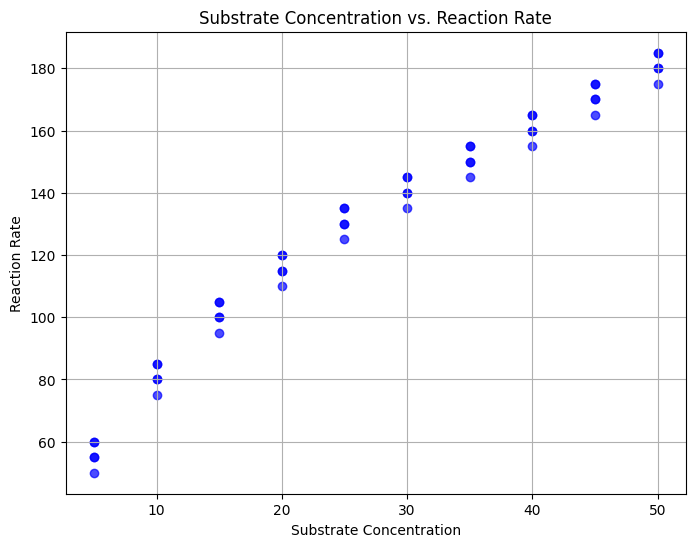

Column 'Enzyme_Conc' not found in the dataset.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data with reaction rates
file_path = '/content/drive/MyDrive/Arpita_Khanom_Estimation_of_Biochemical_Reaction_Rate.csv'
data = pd.read_csv(file_path)

# Step 3: Visualization

# Visualization 1: Substrate Concentration vs. Reaction Rate
plt.figure(figsize=(8, 6))
plt.scatter(data['Substrate_Conc (mM)'], data['Reaction_Rate (µM/s)'], color='blue', alpha=0.7)
plt.title('Substrate Concentration vs. Reaction Rate')
plt.xlabel('Substrate Concentration')
plt.ylabel('Reaction Rate')
plt.grid(True)
plt.show()

# Visualization 2: Reaction Rates for Different Enzyme Concentrations
if 'Enzyme_Conc' in data.columns:
    plt.figure(figsize=(8, 6))
    for enzyme_conc in data['Enzyme_Conc'].unique():
        subset = data[data['Enzyme_Conc'] == enzyme_conc]
        plt.plot(subset['Substrate_Conc'], subset['Reaction_Rate'], label=f'Enzyme Conc: {enzyme_conc}')

    plt.title('Reaction Rates for Different Enzyme Concentrations')
    plt.xlabel('Substrate Concentration')
    plt.ylabel('Reaction Rate')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Column 'Enzyme_Conc' not found in the dataset.")

# **Analysis for Substrate Concentration vs. Reaction Rate (Scatter Plot)**

The scatter plot represents the relationship between substrate concentration (x-axis) and reaction rate (y-axis).

# **Observations:**

*   At lower substrate concentrations, the reaction rate increases significantly.

*   As the substrate concentration increases, the reaction rate starts to plateau.
*  This plateau indicates that the reaction has reached a maximum velocity (Vmax), likely because all enzyme active sites are saturated.

# **Interpretation:**

*   The system follows Michaelis-Menten kinetics, where the reaction rate is initially limited by substrate availability and eventually reaches saturation due to enzyme capacity.
*   Key parameters such as
𝑉
max
V
max
​
  and
𝐾
𝑚
K
m
​
  (substrate concentration at half
𝑉
max
V
max
​
 ) can be determined from this data using curve fitting.

# **Next Steps:**


*   Apply Michaelis-Menten curve fitting to extract kinetic parameters.
*   Test with higher substrate concentrations to confirm the plateau behavior.





### **A comparison of reaction rates for different enzyme concentrations**

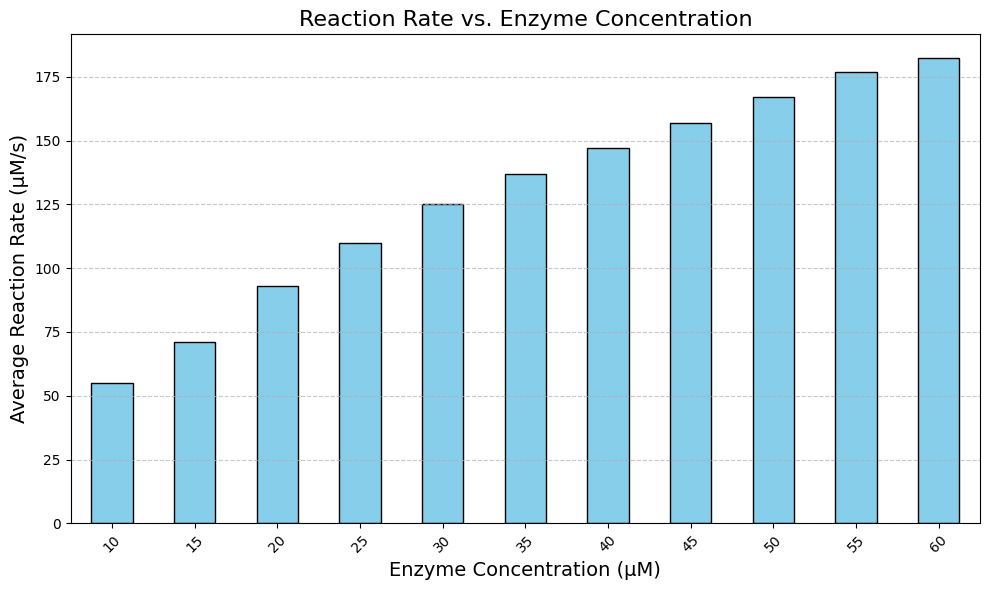

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
dataset_path = '/content/drive/MyDrive/Arpita_Khanom_Estimation_of_Biochemical_Reaction_Rate.csv'
data = pd.read_csv(dataset_path)

# Grouping data by Enzyme Concentration and calculating the mean Reaction Rate
grouped_data = data.groupby('Enzyme_Conc (µM)')['Reaction_Rate (µM/s)'].mean()

# Creating the bar chart
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Reaction Rate vs. Enzyme Concentration', fontsize=16)
plt.xlabel('Enzyme Concentration (µM)', fontsize=14)
plt.ylabel('Average Reaction Rate (µM/s)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the bar chart
plt.show()


## **Analysis for Enzyme Concentration vs. Reaction Rate (Bar Chart)**
The bar chart illustrates the relationship between enzyme concentration (x-axis) and the average reaction rate (y-axis).

# **Observations:**

*  The reaction rate increases linearly with enzyme concentration within the range shown.
*   No plateau is observed, meaning the system is enzyme-limited.

*   The rate of increase is consistent, suggesting a direct proportional relationship between enzyme concentration and reaction rate.

# **Interpretation:**

*   The data suggests that increasing enzyme concentration provides more active sites for the reaction, resulting in a higher reaction rate.
*  Substrate concentration in this experiment is likely in excess, preventing substrate limitation.




